In [1]:
import os
# change working directory
root_dir = os.path.join(os.getcwd(), '..')
os.chdir(root_dir)

In [2]:
os.getcwd(), os.listdir(os.getcwd())

('/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA',
 ['paper', 'notebooks', 'data', 'src', 'notes.txt'])

In [26]:
import glob
import scipy.io as sio
from src.utils import custom_sort

In [27]:
data_path = os.path.join(os.getcwd(),'data')
os.listdir(data_path)

['Depth', 'Inertial', 'Sample_Code', 'Skeleton']

In [ ]:
depth_path = os.path.join(data_path, 'Depth')
depth_data_full_path = glob.glob(os.path.join(depth_path, '*mat'))
depth_data_full_path = custom_sort(depth_data_full_path)
depth_data = [sio.loadmat(x) for x in depth_data_full_path]
depth_name = [x.split('/')[-1].split('.')[0] for x in depth_data_full_path]

In [ ]:
len(skeleton_name), len(depth_name), len(inertial_name)

In [7]:
depth_data_fp = glob.glob(os.path.join(data_path, 'Depth', '*.mat'))

In [10]:
depth_data_1 = sio.loadmat(depth_data_fp[0])

In [12]:
depth_data_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'd_depth'])

In [15]:
info = depth_data_1['d_depth']

In [18]:
info.shape, info.max(), info.mean(), info.min()

((240, 320, 66), 3262, 249.6885075363005, 0)

In [19]:
info[:,:,1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

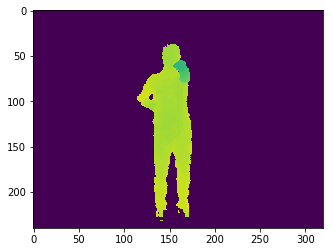

In [24]:
import matplotlib.pyplot as plt
plt.imshow(info[:,:,20])
plt.show()

In [ ]:
inertial_path = os.path.join(data_path, 'Inertial')
inertial_data_full_path = glob.glob(os.path.join(inertial_path, '*mat'))
inertial_data_full_path = custom_sort(inertial_data_full_path)
inertial_data = [sio.loadmat(x) for x in inertial_data_full_path]
inertial_name = [x.split('/')[-1].split('.')[0] for x in inertial_data_full_path]

In [ ]:
skeleton_path = os.path.join(data_path, 'Skeleton')
skeleton_data_full_path = glob.glob(os.path.join(skeleton_path, '*mat'))
skeleton_data_full_path = custom_sort(skeleton_data_full_path)
skeleton_data = [sio.loadmat(x) for x in skeleton_data_full_path]
skeleton_name = [x.split('/')[-1].split('.')[0] for x in skeleton_data_full_path]